In [1]:
import numpy as np
import random
import os
import pickle

import sys
sys.path.insert(0, '../../')
from definitions import *

from src.models.cv_functions import *

from src.models.plots import *

In [2]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score,roc_curve, f1_score
from sklearn.metrics import explained_variance_score,mean_squared_error, r2_score, median_absolute_error
from sklearn.preprocessing import label_binarize

from lightgbm import LGBMModel, LGBMClassifier, LGBMRegressor 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression

Set base model

In [3]:
n_iter,n_jobs, n_estimators,k=10,10,500,3

rf_model= RandomForestClassifier(random_state=42,n_estimators=n_estimators, n_jobs=n_jobs)

#### MRLSM

In [506]:
names=['logsig_3_features_count_time_auged_0_0.npy']

subsubfolders=['_general/']

#### Ten-week-window level and patient level performance

Current data length: 10
Current data folder: /scratch/wuy/asrm_qids_mental_health/OCT_2020/data/processed/weekly/cla/10/many_per_par_general/
(6690, 91)
logsig_3_features_count_time_auged_0_0.npy:
<function accuracy_score at 0x7f308c238f28>
0.6651718983557549


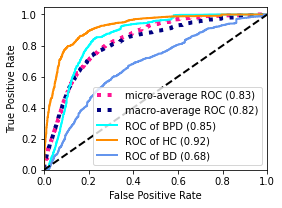

<function accuracy_score at 0x7f308c238f28>
Patient level (major voting): 0.7482014388489209
Patient level (max mean_probs): 0.7266187050359713


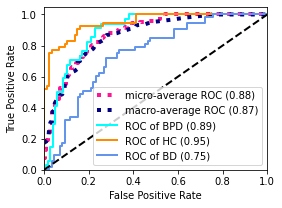

[[27  1  6]
 [ 0 44  8]
 [11  9 33]]
[[25  1  8]
 [ 0 44  8]
 [11 10 32]]




In [507]:
prob_preds_list_list,test_len_list_list,\
test_preds_MRLSM,ids_MRLSM,correct_ids_MRLSM,\
_,_,_,test_true_list_list=model_features_many_per_par_in_one_go(rf_model, names,k=k,\
                                                                subsubfolders=subsubfolders,\
                                                                minlen_list=minlen_list)

    Plot confusion matrix for hard voting

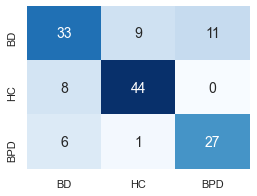

In [596]:
cm_MRLSM=np.array([[33,  9, 11],
 [ 8, 44,  0],
 [6,  1,  27]])
plot_confusions(cm_MRLSM, target_names,savetitle=DATA_DIR+'plots/MRLSM_cm')

    Compute f1 scores

In [12]:
print(f1_score(27,11,7),f1_score(44,10,8),f1_score(33,14,20))

0.75 0.8301886792452831 0.66


In [32]:
print(f1_score(25,11,9),f1_score(44,11,8),f1_score(32,16,21))

0.7142857142857143 0.822429906542056 0.6336633663366337


    Plot ROC-AUC plots with 95% confidence level

0 0.911 [0.873,0.943]
1 0.953 [0.928,0.979]
2 0.806 [0.748,0.858]


3: 100
last (100,)
last (100,)
last (100,)
2: 100


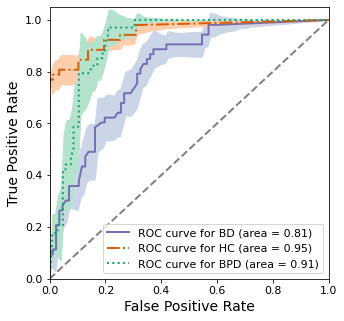

In [413]:
test_true,prob_preds,test_lens=test_true_list_list[0][0],prob_preds_list_list[0][0],test_len_list_list[0][0]

rocci_plot(test_true,test_lens,prob_preds,args=[None,2])

0 0.890 [0.847,0.928]
1 0.946 [0.920,0.973]
2 0.746 [0.681,0.804]


3: 100
last (100,)
last (100,)
last (100,)
2: 100


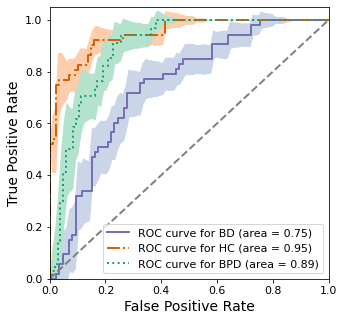

In [414]:
rocci_plot(test_true,test_lens,prob_preds,args=[None,2],vote='soft')

    Spectrum analysis

In [121]:
from some_functions import *

In [289]:
id_proposed=0

probs_proposed=prob_preds_list_list[0][id_proposed]

minlen=10
data_cat='weekly'

proposed_data_subdir=DATA_processed+data_cat+'/'+name_reg[0]+'/'+str(minlen)+'/many_per_par'+subsubfolders[-1]
proposed_lens=np.load(proposed_data_subdir+'lens.npy')
proposed_y=load_pickle(proposed_data_subdir+'Y.pkl')   
    
proposed_full_idxs=full_idx_creator(proposed_lens)
pred_proposed=np.array([np.mean(probs_proposed[proposed_full_idxs[i]],axis=0) for i in range(len(proposed_lens))])
# pred_proposed=np.array([prob_individual(probs_proposed[proposed_full_idxs[i]]) for i in range(len(proposed_lens))])


proposed_y_labels=np.array([proposed_y[proposed_full_idxs[i][0]] for i in range(len(proposed_lens))],dtype='int')


mental_dict={0:"borderline",1:"healthy",2:"bipolar"}



trianglePoints_proposed={
                        "borderline":  [],
                        "healthy":     [],
                        "bipolar":     []
                    }


for j in range(len(proposed_y_labels)):
    
    trianglePoints_proposed[mental_dict[proposed_y_labels[j]]].append(pred_proposed[j])

In [291]:
pred_proposed.shape

(139, 3)

In [113]:
proposed_data_subdir

'/scratch/wuy/asrm_qids_mental_health/OCT_2020/data/processed/weekly/cla/10/many_per_par_general/'

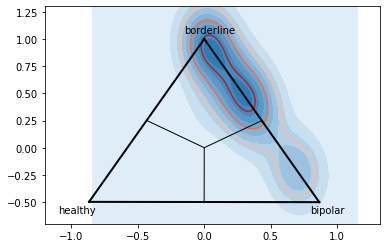

In [127]:
plotDensityMap(trim_triangle(trianglePoints_proposed["borderline"]), title=DATA_DIR+'plots/triangle_BPD')

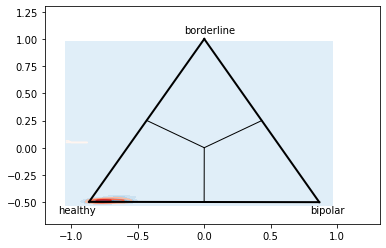

In [346]:
plotDensityMap(trim_triangle_HC(trianglePoints_proposed["healthy"]),title=DATA_DIR+'plots/triangle_HC')
# plt.scatter(pointsX,pointsY)

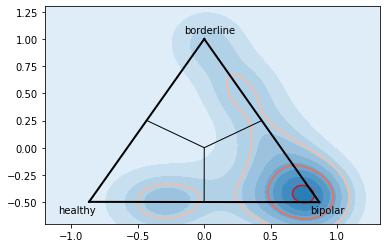

In [123]:
plotDensityMap(trianglePoints_proposed["bipolar"], title=DATA_DIR+'plots/triangle_BD')

 ###   Patients correctly diagnosed by MRLSM only

### BD

Now let us look at 14036:

/home/wuy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
/home/wuy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
/home/wuy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the d

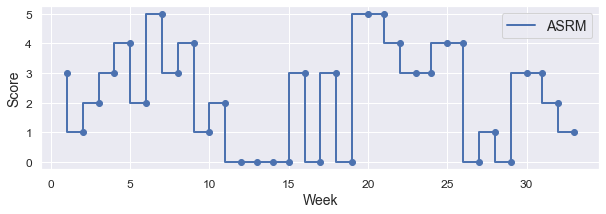

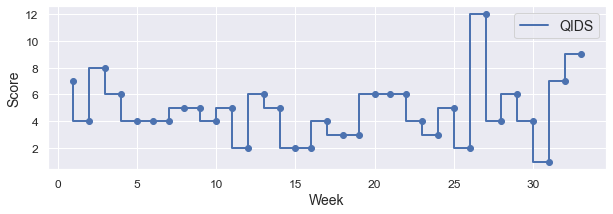

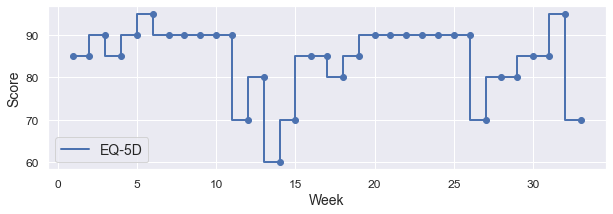

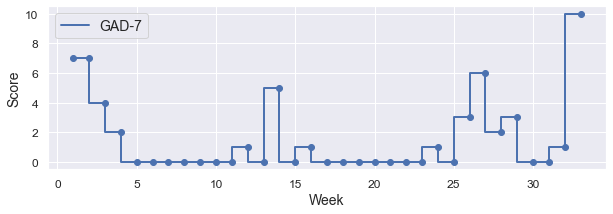

In [594]:
ylims=[(0,6),(0,15),(60,100),(0,12)]
plot_traj(14036, ylims=None,linestyle="steps-pre",save=True)

### BPD

14020

/home/wuy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
/home/wuy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
/home/wuy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the d

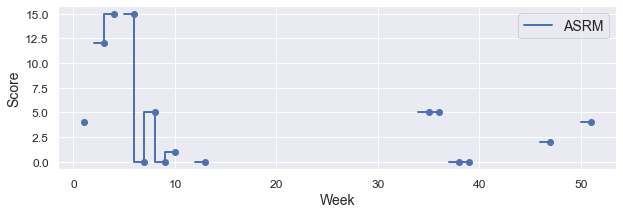

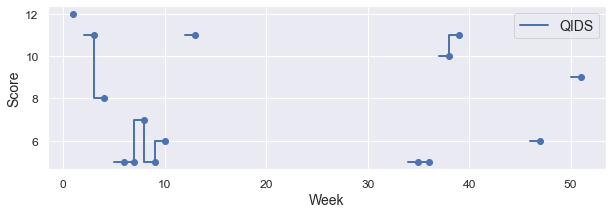

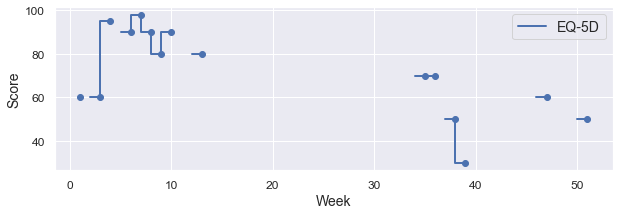

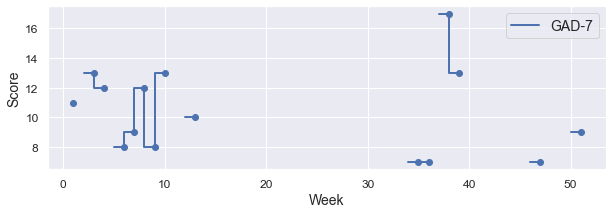

In [592]:
plot_traj(14020, ylims=None,linestyle="steps-pre",save=True)